Additive synth that generates a 'constant spectrum melody' from a sum of tones each of
which has fund+incr frequency and contains harm number of harmonics with 1/f amplitude.
    
First done by Jean-Claude Risset at Bell Labs
Inspired by these articles:
* http://www.ee.columbia.edu/~marios/projects/risset_beats/risset_beats.html
* https://en.wikipedia.org/wiki/Constant_spectrum_melody

In [241]:
%pylab inline
from scipy import signal
import math
import numpy as np
pylab.rcParams['figure.figsize'] = (16, 6)
pylab.rcParams["font.size"] = "14"
import IPython.display as ipd

# settings
SRATE = 22050

Populating the interactive namespace from numpy and matplotlib


In [242]:
def risset_beats(frq, incr, harm, voices, dur, srat=SRATE):
    """Additive synth that generates a 'constant spectrum melody'

    Args:
       frq: the fundamental of the first tone in Hz
       incr: the increment in Hz for the subsequent tones
       harm: the number of harmonincs in each tone
       voices: the number of voices
       dur:  the duration of the resulting sound in sec
       srat: the sampling frequency

    Returns: vector of wave and vector of time
    """

    nyq  = srat / 2.0
    twopi = 2.0 * np.pi
    harm += 1
    # (start, end, num-values)
    t = np.linspace(0, dur, dur*srat)
    a = np.zeros(len(t))
    for _ in range(voices):
        for h in range(1,harm):
            # Check for aliasing
            if (h * frq > nyq):
                break
            #print("Adding harmonics(%d)" % h)
            a += (1.0 / h) * np.sin(t * twopi * h * frq)
        frq += incr
    # print("Calculated %d audio samples" % len(a))
    # normalize
    xmin = np.min(a)
    xmax = np.max(a)
    fc = 1.0 / max(-xmin, xmax)
    # print("Amplify by %f (min %f, max %f)" % (fc, xmin, xmax))
    return a * fc, t

In [250]:
def display_wave(v, t, srat=SRATE):
    figure(2)
    
    # waveform
    subplot(221)
    plot(t, v)
    xlabel('Time (s)')
    grid(True)
    margins(0.0)
    
    subplot(222)
    # for get_cmap: https://matplotlib.org/examples/color/colormaps_reference.html
    pxx, freqs, bins, im = specgram(v, Fs=srat, NFFT=512, cmap=get_cmap('plasma'))
    # depending on number of harmonics, large parts of the spectrum are empty, hence zoom a bit
    axis(ymin=0, ymax=srat/6)
    xlabel('Time (s)')
    ylabel('Frequency (Hz)')

    plt.show()

    # audio player
    ipd.display(ipd.Audio(v, rate=srat))

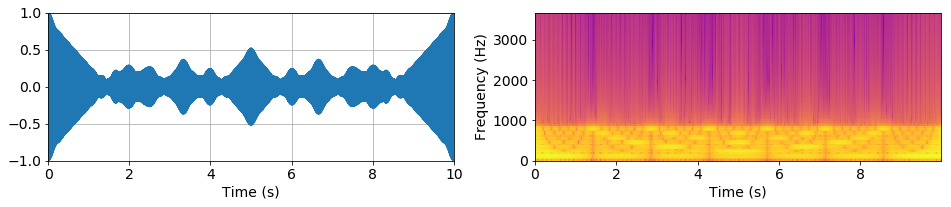

In [244]:
display_wave(*risset_beats(110, 0.1, 7, 7, 10))

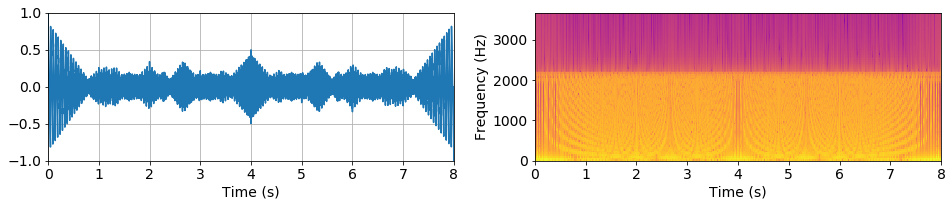

In [245]:
display_wave(*risset_beats(20, 0.125, 100, 10, 8))

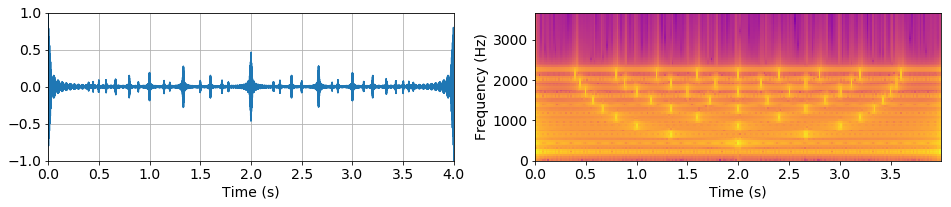

In [246]:
display_wave(*risset_beats(200, 0.25, 10, 100, 4))

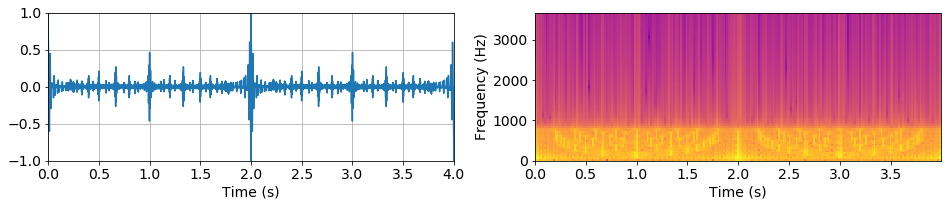

In [247]:
display_wave(*risset_beats(50, 0.5, 10, 50, 4))

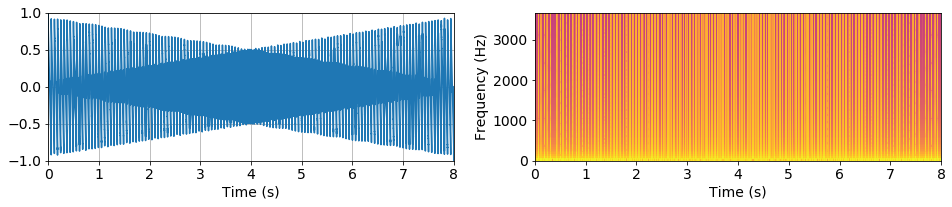

In [248]:
display_wave(*risset_beats(16, 0.125, 300, 2, 8))

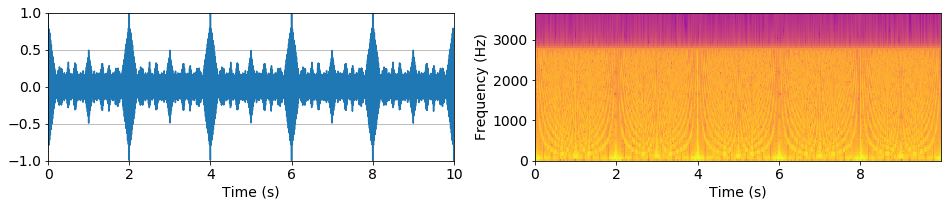

In [249]:
display_wave( *risset_beats(50, 0.5, 50, 10, 10))